┌───┐ ░       ░ ┌───┐┌─┐   
 x_0: ┤ H ├─░───────░─┤ H ├┤M├───
      ├───┤ ░       ░ ├───┤└╥┘┌─┐
 x_1: ┤ H ├─░───■───░─┤ H ├─╫─┤M├
      └───┘ ░   │   ░ └───┘ ║ └╥┘
 y_0: ──────░───┼───░───────╫──╫─
            ░ ┌─┴─┐ ░       ║  ║ 
 y_1: ──────░─┤ X ├─░───────╫──╫─
            ░ └───┘ ░       ║  ║ 
c4: 2/══════════════════════╩══╩═
                            0  1

{'00': 1}


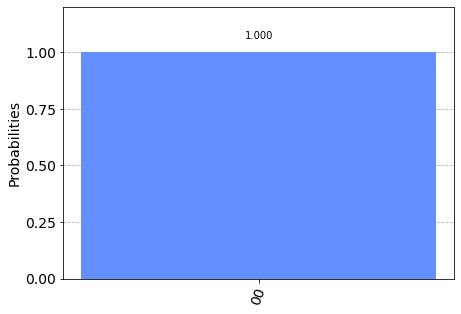

In [4]:
# Experiment 1
# %load ~cis492s/pub/Simon.py
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

n = 2 

def Oracle():
    x = QuantumRegister(n)
    y = QuantumRegister(n)
    c = ClassicalRegister(n)
    fc = QuantumCircuit(x,y,c)
    fc.cx(x[1],y[1]) 
    return fc

xq = QuantumRegister(n,'x')
yq = QuantumRegister(n,'y')
c = ClassicalRegister(n)

qc = QuantumCircuit(xq,yq,c)

# Apply H-gates for the top n-qubit xq
qc.h(xq)
qc.barrier()

# get the Oracle circuit and compose it  
Fc = Oracle()
qc.compose(Fc,inplace=True)

qc.barrier()

# Apply H-gates for the top n-qubit xq
qc.h(xq)

# Measure
qc.measure(xq,c)

# Display circuit
display(qc.draw())

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, aer_sim)
results = aer_sim.run(qobj,shots=1).result()
counts = results.get_counts()

# Because c0 is the rightmost bit in the Qiskit output string,
# we have to reverse the string in the count dictionary
answer = {}
for str in counts:
    answer[str[::-1]] = counts[str]

print(answer)

plot_histogram(answer)



┌───┐ ░                      ░ ┌───┐┌─┐   
  x_0: ┤ H ├─░───■─────────■────■───░─┤ H ├┤M├───
       ├───┤ ░   │         │    │   ░ ├───┤└╥┘┌─┐
  x_1: ┤ H ├─░───┼────■────┼────┼───░─┤ H ├─╫─┤M├
       └───┘ ░ ┌─┴─┐  │  ┌─┴─┐  │   ░ └───┘ ║ └╥┘
  y_0: ──────░─┤ X ├──┼──┤ X ├──┼───░───────╫──╫─
             ░ └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║ 
  y_1: ──────░──────┤ X ├─────┤ X ├─░───────╫──╫─
             ░      └───┘     └───┘ ░       ║  ║ 
c34: 2/═════════════════════════════════════╩══╩═
                                            0  1

{'00': 1}


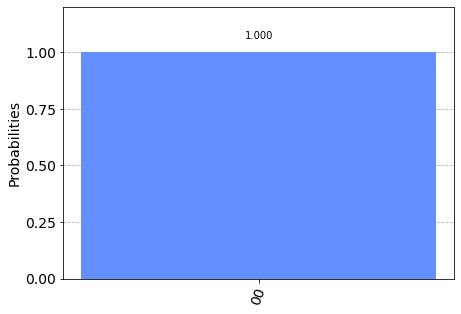

In [19]:
# Experiment 2
# %load ~cis492s/pub/Simon.py
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

n = 2 

def Oracle():
    x = QuantumRegister(n)
    y = QuantumRegister(n)
    c = ClassicalRegister(n)
    fc = QuantumCircuit(x,y,c)
    fc.cx(x[0],y[0])
    fc.cx(x[1],y[1]) 
    fc.cx(x[0],y[0])
    fc.cx(x[0],y[1])
    return fc

xq = QuantumRegister(n,'x')
yq = QuantumRegister(n,'y')
c = ClassicalRegister(n)

qc = QuantumCircuit(xq,yq,c)

# Apply H-gates for the top n-qubit xq
qc.h(xq)
qc.barrier()

# get the Oracle circuit and compose it  
Fc = Oracle()
qc.compose(Fc,inplace=True)

qc.barrier()

# Apply H-gates for the top n-qubit xq
qc.h(xq)

# Measure
qc.measure(xq,c)

# Display circuit
display(qc.draw())

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, aer_sim)
results = aer_sim.run(qobj,shots=1).result()
counts = results.get_counts()

# Because c0 is the rightmost bit in the Qiskit output string,
# we have to reverse the string in the count dictionary
answer = {}
for str in counts:
    answer[str[::-1]] = counts[str]

print(answer)

plot_histogram(answer)



┌───┐ ░                           ░ ┌───┐┌─┐      
  x_0: ┤ H ├─░───■───────────────────────░─┤ H ├┤M├──────
       ├───┤ ░   │                       ░ ├───┤└╥┘┌─┐   
  x_1: ┤ H ├─░───┼────■─────────■────■───░─┤ H ├─╫─┤M├───
       ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
  x_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
       └───┘ ░ ┌─┴─┐  │    │    │    │   ░ └───┘ ║  ║ └╥┘
  y_0: ──────░─┤ X ├──┼────┼────┼────┼───░───────╫──╫──╫─
             ░ └───┘┌─┴─┐  │  ┌─┴─┐  │   ░       ║  ║  ║ 
  y_1: ──────░──────┤ X ├──┼──┤ X ├──┼───░───────╫──╫──╫─
             ░      └───┘┌─┴─┐└───┘┌─┴─┐ ░       ║  ║  ║ 
  y_2: ──────░───────────┤ X ├─────┤ X ├─░───────╫──╫──╫─
             ░           └───┘     └───┘ ░       ║  ║  ║ 
c56: 3/══════════════════════════════════════════╩══╩══╩═
                                                 0  1  2

{'111': 1}


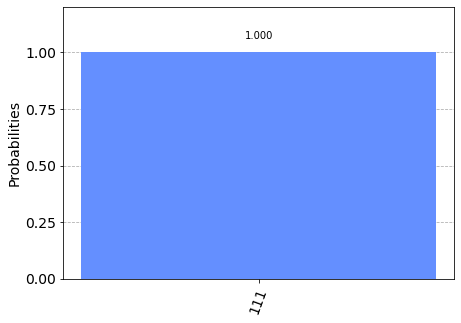

In [30]:
# Experiment 3
# %load ~cis492s/pub/Simon.py
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

n = 3

def Oracle():
    x = QuantumRegister(n)
    y = QuantumRegister(n)
    c = ClassicalRegister(n)
    fc = QuantumCircuit(x,y,c)
    fc.cx(x[0],y[0])
    fc.cx(x[1],y[1]) 
    fc.cx(x[2],y[2]) 
    fc.cx(x[1],y[1])
    fc.cx(x[1],y[2])
    return fc

xq = QuantumRegister(n,'x')
yq = QuantumRegister(n,'y')
c = ClassicalRegister(n)

qc = QuantumCircuit(xq,yq,c)

# Apply H-gates for the top n-qubit xq
qc.h(xq)
qc.barrier()

# get the Oracle circuit and compose it  
Fc = Oracle()
qc.compose(Fc,inplace=True)

qc.barrier()

# Apply H-gates for the top n-qubit xq
qc.h(xq)

# Measure
qc.measure(xq,c)

# Display circuit
display(qc.draw())

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, aer_sim)
results = aer_sim.run(qobj,shots=1).result()
counts = results.get_counts()

# Because c0 is the rightmost bit in the Qiskit output string,
# we have to reverse the string in the count dictionary
answer = {}
for str in counts:
    answer[str[::-1]] = counts[str]

print(answer)

plot_histogram(answer)



┌───┐ ░                           ░ ┌───┐┌─┐      
  x_0: ┤ H ├─░───■──────────────■────■───░─┤ H ├┤M├──────
       ├───┤ ░   │              │    │   ░ ├───┤└╥┘┌─┐   
  x_1: ┤ H ├─░───┼────■─────────┼────┼───░─┤ H ├─╫─┤M├───
       ├───┤ ░   │    │         │    │   ░ ├───┤ ║ └╥┘┌─┐
  x_2: ┤ H ├─░───┼────┼────■────┼────┼───░─┤ H ├─╫──╫─┤M├
       └───┘ ░ ┌─┴─┐  │    │  ┌─┴─┐  │   ░ └───┘ ║  ║ └╥┘
  y_0: ──────░─┤ X ├──┼────┼──┤ X ├──┼───░───────╫──╫──╫─
             ░ └───┘┌─┴─┐  │  └───┘┌─┴─┐ ░       ║  ║  ║ 
  y_1: ──────░──────┤ X ├──┼───────┤ X ├─░───────╫──╫──╫─
             ░      └───┘┌─┴─┐     └───┘ ░       ║  ║  ║ 
  y_2: ──────░───────────┤ X ├───────────░───────╫──╫──╫─
             ░           └───┘           ░       ║  ║  ║ 
c62: 3/══════════════════════════════════════════╩══╩══╩═
                                                 0  1  2

{'111': 248, '001': 253, '110': 257, '000': 242}
110.111 = 0 (mod 2)
110.001 = 0 (mod 2)
110.110 = 0 (mod 2)
110.000 = 0 (mod 2)


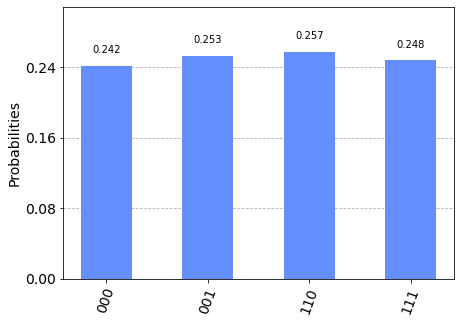

In [35]:
# Experiment 4
# %load ~cis492s/pub/Simon.py
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

s = '110'
n = len(s)

def Oracle():
    x = QuantumRegister(n)
    y = QuantumRegister(n)
    c = ClassicalRegister(n)
    fc = QuantumCircuit(x,y,c)
    for i in range(n):
        fc.cx(x[i], y[i])
    fc.cx(x[0], y[0])
    fc.cx(x[0], y[1])
    return fc

def bdotz(s, a):
    accum = 0
    for i in range(len(s)):
        accum += int(s[i]) * int(a[i])
    return (accum % 2)

xq = QuantumRegister(n,'x')
yq = QuantumRegister(n,'y')
c = ClassicalRegister(n)

qc = QuantumCircuit(xq,yq,c)

# Apply H-gates for the top n-qubit xq
qc.h(xq)
qc.barrier()

# get the Oracle circuit and compose it  
Fc = Oracle()
qc.compose(Fc,inplace=True)

qc.barrier()

# Apply H-gates for the top n-qubit xq
qc.h(xq)

# Measure
qc.measure(xq,c)

# Display circuit
display(qc.draw())

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, aer_sim)
results = aer_sim.run(qobj,shots=1000).result()
counts = results.get_counts()

# Because c0 is the rightmost bit in the Qiskit output string,
# we have to reverse the string in the count dictionary
answer = {}
for str in counts:
    answer[str[::-1]] = counts[str]

print(answer)

for a in answer:
    print('{}.{} = {} (mod 2)'.format(s, a, bdotz(s,a)))

plot_histogram(answer)



┌───┐ ░                                          ░ ┌───┐┌─┐            
  x_0: ┤ H ├─░───■──────────────────────────────────────░─┤ H ├┤M├────────────
       ├───┤ ░   │                                      ░ ├───┤└╥┘┌─┐         
  x_1: ┤ H ├─░───┼────■───────────────────■────■────■───░─┤ H ├─╫─┤M├─────────
       ├───┤ ░   │    │                   │    │    │   ░ ├───┤ ║ └╥┘┌─┐      
  x_2: ┤ H ├─░───┼────┼────■──────────────┼────┼────┼───░─┤ H ├─╫──╫─┤M├──────
       ├───┤ ░   │    │    │              │    │    │   ░ ├───┤ ║  ║ └╥┘┌─┐   
  x_3: ┤ H ├─░───┼────┼────┼────■─────────┼────┼────┼───░─┤ H ├─╫──╫──╫─┤M├───
       ├───┤ ░   │    │    │    │         │    │    │   ░ ├───┤ ║  ║  ║ └╥┘┌─┐
  x_4: ┤ H ├─░───┼────┼────┼────┼────■────┼────┼────┼───░─┤ H ├─╫──╫──╫──╫─┤M├
       └───┘ ░ ┌─┴─┐  │    │    │    │    │    │    │   ░ └───┘ ║  ║  ║  ║ └╥┘
  y_0: ──────░─┤ X ├──┼────┼────┼────┼────┼────┼────┼───░───────╫──╫──╫──╫──╫─
             ░ └───┘┌─┴─┐  │    │    │  ┌─┴─┐  │    │   ░       ║  ║  ║  ║  ║ 
  y_1: ──────░──────┤ X ├──┼────┼────┼──┤ X ├──┼────┼───░───────╫──╫──╫──╫──╫─
             ░      └───┘┌─┴─┐  │    │  └───┘  │    │   ░       ║  ║  ║  ║  ║ 
  y_2: ──────░───────────┤ X ├──┼────┼─────────┼────┼───░───────╫──╫──╫──╫──╫─
             ░           └───┘┌─┴─┐  │       ┌─┴─┐  │   ░       ║  ║  ║  ║  ║ 
  y_3: ──────░────────────────┤ X ├──┼───────┤ X ├──┼───░───────╫──╫──╫──╫──╫─
             ░                └───┘┌─┴─┐     └───┘┌─┴─┐ ░       ║  ║  ║  ║  ║ 
  y_4: ──────░─────────────────────┤ X ├──────────┤ X ├─░───────╫──╫──╫──╫──╫─
             ░                     └───┘          └───┘ ░       ║  ║  ║  ║  ║ 
c82: 5/═════════════════════════════════════════════════════════╩══╩══╩══╩══╩═
                                                                0  1  2  3  4

{'01001': 58, '11101': 59, '11010': 70, '01110': 79, '00011': 50, '10000': 61, '10100': 56, '01010': 62, '11110': 63, '10011': 66, '00100': 59, '11001': 55, '10111': 69, '00000': 80, '00111': 57, '01101': 56}
01011.01001 = 0 (mod 2)
01011.11101 = 0 (mod 2)
01011.11010 = 0 (mod 2)
01011.01110 = 0 (mod 2)
01011.00011 = 0 (mod 2)
01011.10000 = 0 (mod 2)
01011.10100 = 0 (mod 2)
01011.01010 = 0 (mod 2)
01011.11110 = 0 (mod 2)
01011.10011 = 0 (mod 2)
01011.00100 = 0 (mod 2)
01011.11001 = 0 (mod 2)
01011.10111 = 0 (mod 2)
01011.00000 = 0 (mod 2)
01011.00111 = 0 (mod 2)
01011.01101 = 0 (mod 2)


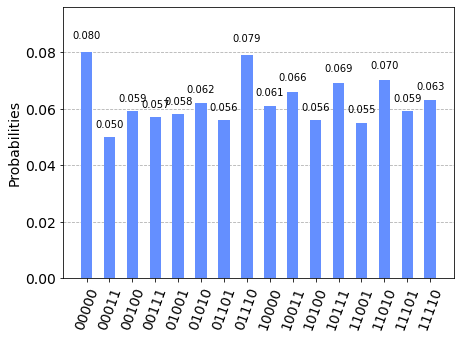

In [45]:
# Experiment 5
# %load ~cis492s/pub/Simon.py
# initialization
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

## for display
from IPython.display import display

# import basic plot tools
from qiskit.visualization import plot_histogram

s = '01011'
n = len(s)

def Oracle():
    x = QuantumRegister(n)
    y = QuantumRegister(n)
    c = ClassicalRegister(n)
    fc = QuantumCircuit(x,y,c)
    for i in range(n):
        fc.cx(x[i], y[i])
    fc.cx(x[1], y[1])
    fc.cx(x[1], y[3])
    fc.cx(x[1], y[4])
#     fc.cx(x[1], y[1])
#     fc.cx(x[3], y[3])
#     fc.cx(x[3], y[4])
    return fc

def bdotz(s, a):
    accum = 0
    for i in range(len(s)):
        accum += int(s[i]) * int(a[i])
    return (accum % 2)

xq = QuantumRegister(n,'x')
yq = QuantumRegister(n,'y')
c = ClassicalRegister(n)

qc = QuantumCircuit(xq,yq,c)

# Apply H-gates for the top n-qubit xq
qc.h(xq)
qc.barrier()

# get the Oracle circuit and compose it  
Fc = Oracle()
qc.compose(Fc,inplace=True)

qc.barrier()

# Apply H-gates for the top n-qubit xq
qc.h(xq)

# Measure
qc.measure(xq,c)

# Display circuit
display(qc.draw())

# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, aer_sim)
results = aer_sim.run(qobj,shots=1000).result()
counts = results.get_counts()

# Because c0 is the rightmost bit in the Qiskit output string,
# we have to reverse the string in the count dictionary
answer = {}
for str in counts:
    answer[str[::-1]] = counts[str]

print(answer)

for a in answer:
    print('{}.{} = {} (mod 2)'.format(s, a, bdotz(s,a)))

plot_histogram(answer)

